# The CIFAR-10 dataset

## 1.The dataset contains 10 classes. Each class contains 6000 images.

## 2.Load required libraries.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 3.Load the original cifar10 data and create a train and test dataset.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2) 

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_images

array([[[[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[253, 253, 253],
         [250, 250, 250],
         [250, 250, 250],
         ...,
         [250, 250, 250],
         [250, 250, 250],
         [250, 250, 250]],

        [[253, 253, 253],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],

        ...,

        [[253, 253, 253],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],

        [[253, 253, 253],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],

        [[254, 254, 254],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [251, 251, 251],
        

In [ ]:
train_labels

array([[1],
       [0],
       [6],
       ...,
       [5],
       [8],
       [9]], dtype=uint8)

In [ ]:
# ith image
i = 0
train_images[i]

array([[[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[253, 253, 253],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[253, 253, 253],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[253, 253, 253],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[254, 254, 254],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [ ]:
# ith label
i = 0
train_labels[i][0]

1

## 4.Visualize samples of cifar10 dataset.

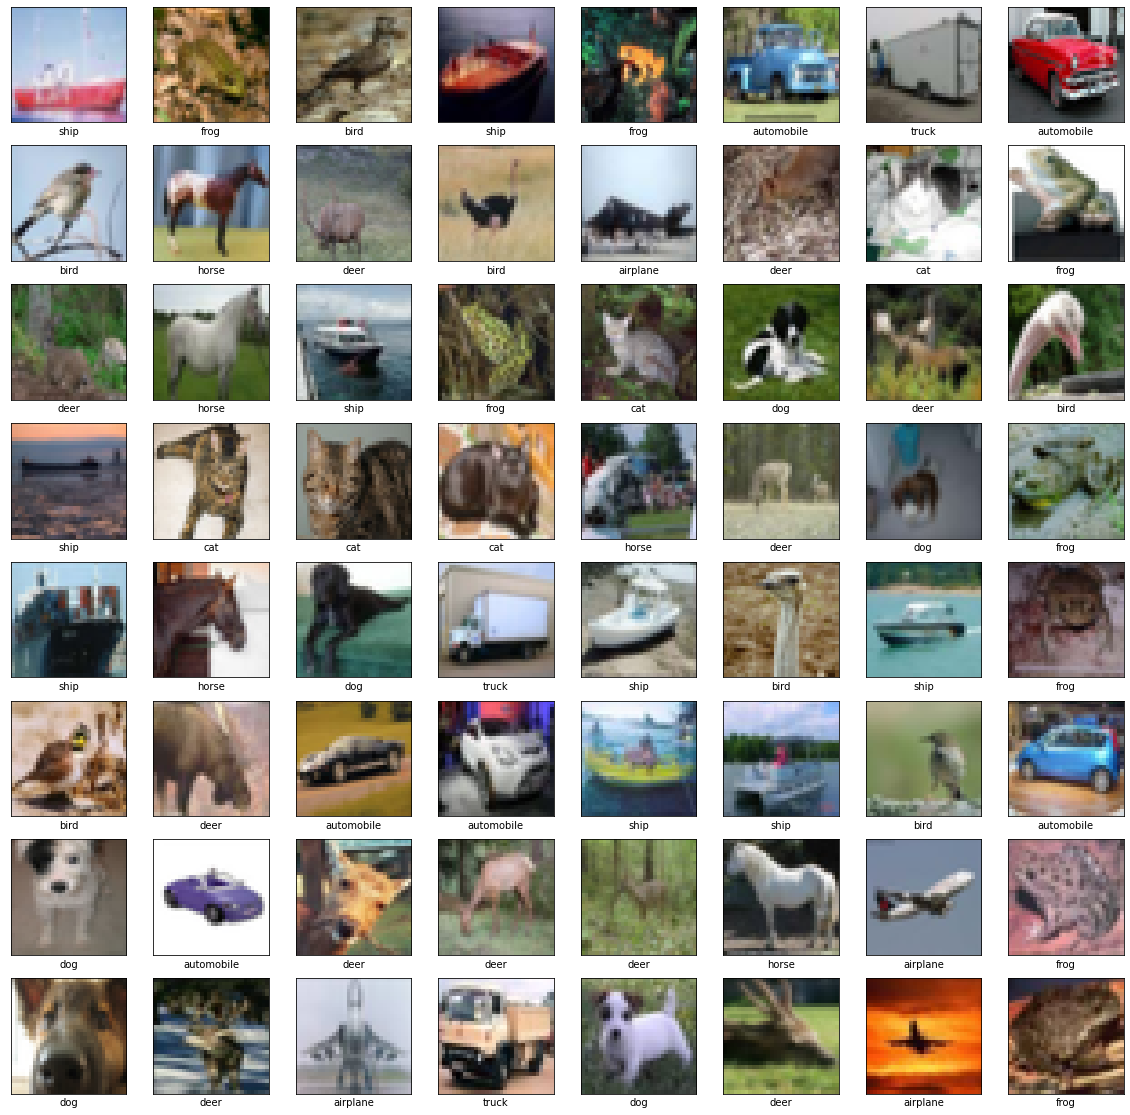

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 5.Use keras to train an Fully Connected Network with and without batch normalization.

#### Model 1

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 98.4754 - accuracy: 0.2368 - val_loss: 73.5698 - val_accuracy: 0.2727
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 87.0993 - accuracy: 0.2584 - val_loss: 70.2086 - val_accuracy: 0.2577
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 84.1063 - accuracy: 0.2636 - val_loss: 92.1851 - val_accuracy: 0.2663
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 85.7580 - accuracy: 0.2709 - val_loss: 96.1450 - val_accuracy: 0.2317
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 84.4228 - accuracy: 0.2747 - val_loss: 103.9600 - val_accuracy: 0.2486
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 84.0800 - accuracy: 0.2782 - val_loss: 88.5357 - val_accuracy: 0.2449
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 88.6375 - accuracy: 0.2786 - val_loss: 82.7166 

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 87.5645 - accuracy: 0.2528 - 511ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc1*100) + "%")

Test accuracy: 25.28%


#### Model 2

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images, val_images = train_images/255, test_images/255, val_images/255

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9779 - accuracy: 0.3112 - val_loss: 2.0174 - val_accuracy: 0.3048
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8864 - accuracy: 0.3478 - val_loss: 1.9299 - val_accuracy: 0.3261
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8672 - accuracy: 0.3603 - val_loss: 1.8771 - val_accuracy: 0.3474
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8434 - accuracy: 0.3677 - val_loss: 1.9419 - val_accuracy: 0.3337
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8275 - accuracy: 0.3704 - val_loss: 1.9012 - val_accuracy: 0.3534
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8254 - accuracy: 0.3762 - val_loss: 1.8577 - val_accuracy: 0.3766
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8085 - accuracy: 0.3802 - val_loss: 1.7871 - val_accuracy:

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.8402 - accuracy: 0.3630 - 555ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc2*100) + "%")

Test accuracy: 36.30%


If we normalize pixel values to be between 0 and 1 we get better results.

#### Model 3

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 1.8724 - accuracy: 0.3100 - val_loss: 1.7941 - val_accuracy: 0.3506
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7140 - accuracy: 0.3827 - val_loss: 1.7013 - val_accuracy: 0.3953
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6492 - accuracy: 0.4044 - val_loss: 1.6218 - val_accuracy: 0.4168
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6085 - accuracy: 0.4190 - val_loss: 1.6194 - val_accuracy: 0.4202
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5749 - accuracy: 0.4337 - val_loss: 1.6020 - val_accuracy: 0.4261
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5492 - accuracy: 0.4414 - val_loss: 1.6171 - val_accuracy: 0.4241
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5274 - accuracy: 0.4494 - val_loss: 1.6427 - val_accuracy:

In [ ]:
test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5331 - accuracy: 0.4576 - 602ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc3*100) + "%")

Test accuracy: 45.76%


A bigger network with more layers is better.

### With  Batch Normalization

#### Model 4

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7947 - accuracy: 0.3648 - val_loss: 1.7526 - val_accuracy: 0.3885
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5969 - accuracy: 0.4306 - val_loss: 1.8643 - val_accuracy: 0.3542
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5273 - accuracy: 0.4544 - val_loss: 1.6798 - val_accuracy: 0.4026
Epoch 4/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4629 - accuracy: 0.4782 - val_loss: 1.5593 - val_accuracy: 0.4471
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4207 - accuracy: 0.4924 - val_loss: 1.6581 - val_accuracy: 0.4213
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3789 - accuracy: 0.5077 - val_loss: 1.6614 - val_accuracy: 0.4410
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3485 - accuracy: 0.5200 - val_loss: 1.5754 - val_accuracy:

In [ ]:
test_loss4, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.4586 - accuracy: 0.4806 - 666ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc4*100) + "%")

Test accuracy: 48.06%


With batch normalization our results are better. 
Generally with normalization we can achieve greater accuracy, because all values are in the same value range.

## 6.Use keras to train a FCN with dropout.

### With Dropout

#### Model 5

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model5.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1492 - accuracy: 0.2364 - val_loss: 1.8701 - val_accuracy: 0.3193
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9347 - accuracy: 0.2910 - val_loss: 1.8064 - val_accuracy: 0.3456
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8819 - accuracy: 0.3119 - val_loss: 1.8178 - val_accuracy: 0.3279
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8738 - accuracy: 0.3163 - val_loss: 1.8550 - val_accuracy: 0.3251
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8518 - accuracy: 0.3251 - val_loss: 1.7799 - val_accuracy: 0.3641
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8330 - accuracy: 0.3333 - val_loss: 1.7590 - val_accuracy: 0.3649
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8224 - accuracy: 0.3328 - val_loss: 1.7378 - val_accuracy:

In [ ]:
test_loss5, test_acc5 = model5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.6726 - accuracy: 0.3971 - 658ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc5*100) + "%")

Test accuracy: 39.71%


Results are worse because our network is not very big.

#### Model 6

In [ ]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model6.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history6 = model6.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.0809 - accuracy: 0.2896 - val_loss: 2.1888 - val_accuracy: 0.2448
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9122 - accuracy: 0.3205 - val_loss: 1.9880 - val_accuracy: 0.3056
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8491 - accuracy: 0.3435 - val_loss: 1.8483 - val_accuracy: 0.3484
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8146 - accuracy: 0.3519 - val_loss: 1.7781 - val_accuracy: 0.3719
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7870 - accuracy: 0.3603 - val_loss: 1.7418 - val_accuracy: 0.3933
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7483 - accuracy: 0.3738 - val_loss: 2.0695 - val_accuracy: 0.3206
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7315 - accuracy: 0.3808 - val_loss: 1.6692 - val_accuracy:

In [ ]:
test_loss6, test_acc6 = model6.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5847 - accuracy: 0.4391 - 750ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc6*100) + "%")

Test accuracy: 43.91%


With dropout we can avoid overfitting, but if our network is not very big, we may get worse results.

## 7.Use keras to train a CNN.

### Use convolutional layers

#### Model 7

In [ ]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model7.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history7 = model7.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6649 - accuracy: 0.3858 - val_loss: 1.6149 - val_accuracy: 0.4242
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3000 - accuracy: 0.5339 - val_loss: 1.2243 - val_accuracy: 0.5654
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1582 - accuracy: 0.5913 - val_loss: 1.1519 - val_accuracy: 0.5952
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0653 - accuracy: 0.6257 - val_loss: 1.1092 - val_accuracy: 0.6114
Epoch 5/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0026 - accuracy: 0.6503 - val_loss: 1.0907 - val_accuracy: 0.6117
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9491 - accuracy: 0.6677 - val_loss: 1.0154 - val_accuracy: 0.6421
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8979 - accuracy: 0.6852 - val_loss: 1.0026 - val_accuracy:

In [ ]:
test_loss7, test_acc7 = model7.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.9744 - accuracy: 0.6651 - 729ms/epoch - 2ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc7*100) + "%")

Test accuracy: 66.51%


With Convolutional neural networks and MaxPooling we get the best results.

#### Model 8

In [ ]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model8.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history8 = model8.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5034 - accuracy: 0.4505 - val_loss: 1.1962 - val_accuracy: 0.5683
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0465 - accuracy: 0.6317 - val_loss: 0.9475 - val_accuracy: 0.6694
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8417 - accuracy: 0.7046 - val_loss: 0.8630 - val_accuracy: 0.6994
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7052 - accuracy: 0.7514 - val_loss: 0.8352 - val_accuracy: 0.7163
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5972 - accuracy: 0.7903 - val_loss: 0.8342 - val_accuracy: 0.7246
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5022 - accuracy: 0.8235 - val_loss: 0.8117 - val_accuracy: 0.7292
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4199 - accuracy: 0.8525 - val_loss: 0.8499 - val_accuracy:

In [ ]:
test_loss8, test_acc8 = model8.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.1690 - accuracy: 0.7170 - 818ms/epoch - 3ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc8*100) + "%")

Test accuracy: 71.70%


With more convolutional layers and using padding, we get greater accuracy.

#### Model 9

### With Batch Normalization and dropout

In [ ]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='linear')
])

In [ ]:
model9.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history9 = model9.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4198 - accuracy: 0.5007 - val_loss: 1.5059 - val_accuracy: 0.4820
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0114 - accuracy: 0.6457 - val_loss: 1.7422 - val_accuracy: 0.4305
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8543 - accuracy: 0.7024 - val_loss: 0.9551 - val_accuracy: 0.6707
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7605 - accuracy: 0.7326 - val_loss: 1.0427 - val_accuracy: 0.6336
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6922 - accuracy: 0.7589 - val_loss: 0.7747 - val_accuracy: 0.7315
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6251 - accuracy: 0.7825 - val_loss: 0.8110 - val_accuracy: 0.7192
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5841 - accuracy: 0.7944 - val_loss: 0.8867 - val_accuracy:

In [ ]:
test_loss9, test_acc9 = model9.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8334 - accuracy: 0.7221 - 863ms/epoch - 3ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc9*100) + "%")

Test accuracy: 72.21%


Using batch normalization and dropout, we can see that val_accuracy is closer to accuracy than before. That means we have better chances to avoid overfitting.

#### Model 10

### Use data generators and data augmentation

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
batch_size = 32
epochs = 10

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1, 
    width_shift_range=0.15, 
    height_shift_range=0.15, 
    horizontal_flip=True, 
    rotation_range=15,
    zoom_range=0.15,
    )

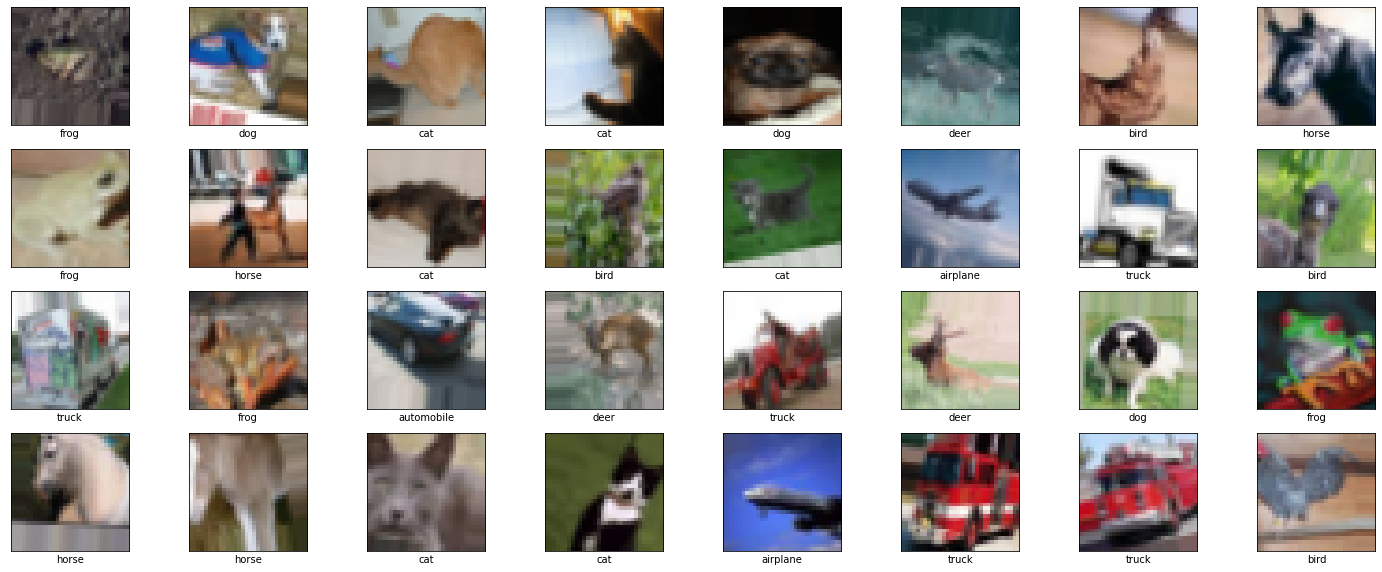

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Every time you ran this cell you get different result
sample_training_images, sample_training_labels = next(datagen.flow(train_images, train_labels, batch_size=batch_size))

plt.figure(figsize=(25, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_training_images[i])
    plt.xlabel(class_names[sample_training_labels[i][0]])
plt.show()

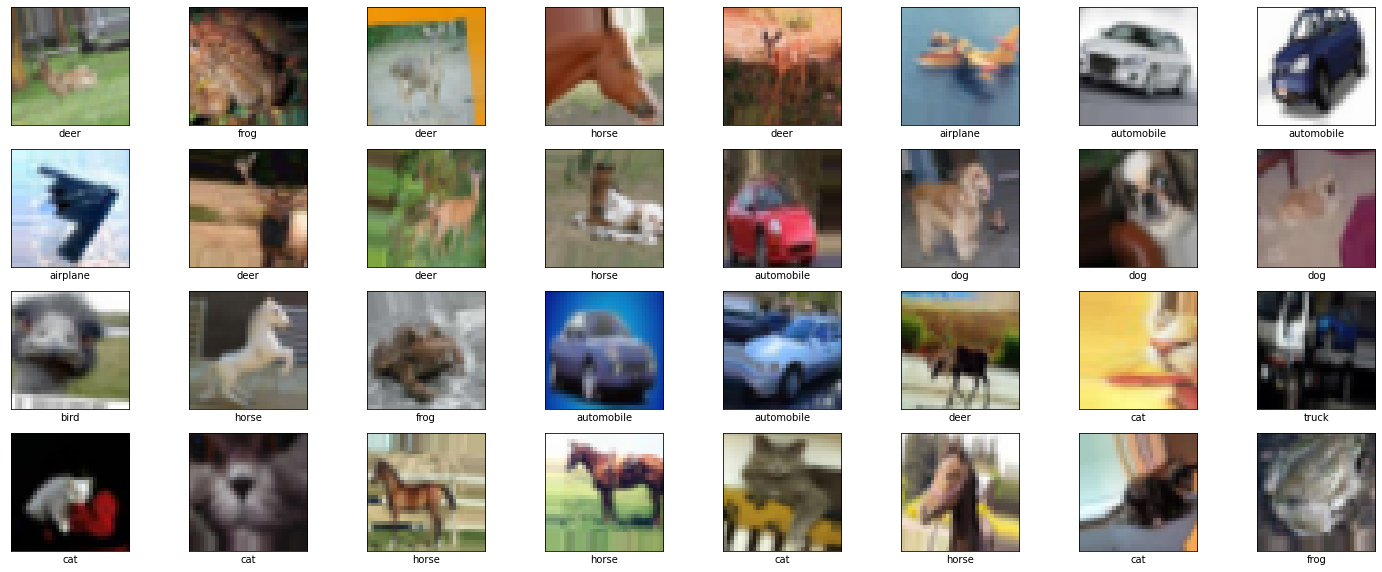

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Every time you ran this cell you get different result
# Observe that we get different images 
sample_training_images, sample_training_labels = next(datagen.flow(train_images, train_labels, batch_size=batch_size))

plt.figure(figsize=(25, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_training_images[i])
    plt.xlabel(class_names[sample_training_labels[i][0]])
plt.show()

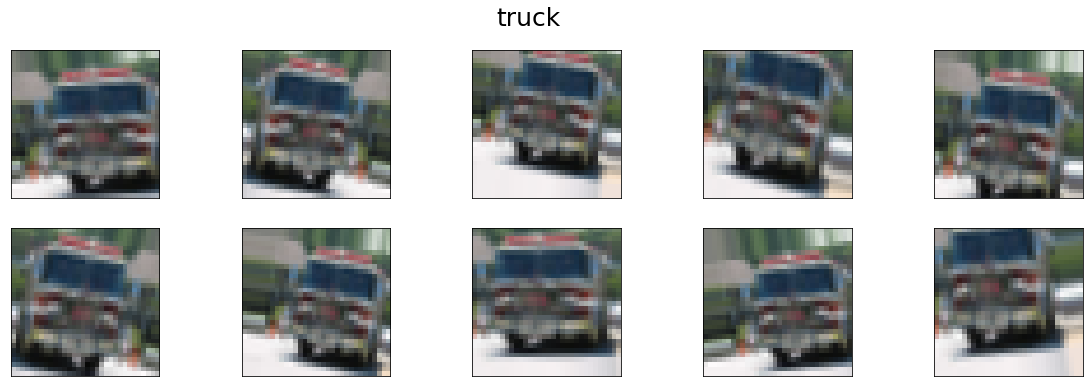

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# See different augmentations on an image
train_data_gen = datagen.flow(train_images, train_labels, batch_size=batch_size)
_ , augmented_training_labels = next(train_data_gen)
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

plt.figure(figsize=(20, 6))
fig = plt.gcf()
fig.suptitle(class_names[augmented_training_labels[0][0]], fontsize=25)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i])
plt.show()

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
model10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model10.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
history10 = model10.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 40s 20ms/step - loss: 1.6289 - accuracy: 0.4166 - val_loss: 2.3917 - val_accuracy: 0.2566
Epoch 2/10
1407/1407 [==============================] - 29s 21ms/step - loss: 1.2773 - accuracy: 0.5456 - val_loss: 1.3551 - val_accuracy: 0.5348
Epoch 3/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.1288 - accuracy: 0.6006 - val_loss: 1.4433 - val_accuracy: 0.5078
Epoch 4/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.0342 - accuracy: 0.6354 - val_loss: 1.1000 - val_accuracy: 0.6254
Epoch 5/10
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9813 - accuracy: 0.6564 - val_loss: 1.3316 - val_accuracy: 0.5340
Epoch 6/10
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9264 - accuracy: 0.6728 - val_loss: 0.9757 - val_accuracy: 0.6586
Epoch 7/10
1407/1407 [==============================] - 34s 24ms/step - loss: 0.8922 - accuracy: 0.6860 - val_loss: 0.9698 -

In [ ]:
test_loss10, test_acc10 = model10.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.7326 - accuracy: 0.7465 - 1s/epoch - 4ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc10*100) + "%")

Test accuracy: 74.65%


With data augmentation we can expand our dataset, if it is small, in order to avoid overfitting.

In [ ]:
def plot_diagrams(history, epochs=epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

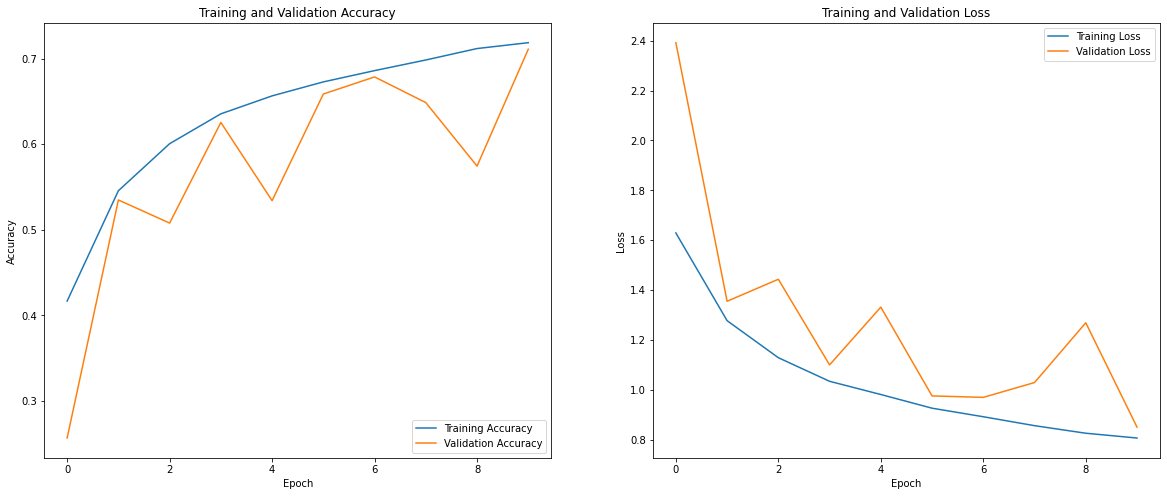

In [ ]:
plot_diagrams(history10)

We can check the diagrams and observe if there is onerfiting or underfiting in our network. We want validation loss and accuracy to be close to training loss and accuracy. We also want loss to decrese and accuracy to increase over time.

Because loss keeps decreasing, when training is over we can assume that our network can do better if we increase epochs. So our model underfits the data.

### Early stoping

#### Model 11

In [ ]:
model11 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model11.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
epochs=500

In [ ]:
history11 = model11.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping])

Epoch 1/500
1407/1407 [==============================] - 31s 21ms/step - loss: 1.6529 - accuracy: 0.4088 - val_loss: 1.8582 - val_accuracy: 0.3552
Epoch 2/500
1407/1407 [==============================] - 28s 20ms/step - loss: 1.2886 - accuracy: 0.5415 - val_loss: 1.3493 - val_accuracy: 0.5254
Epoch 3/500
1407/1407 [==============================] - 28s 20ms/step - loss: 1.1249 - accuracy: 0.6027 - val_loss: 1.5311 - val_accuracy: 0.4546
Epoch 4/500
1407/1407 [==============================] - 28s 20ms/step - loss: 1.0334 - accuracy: 0.6380 - val_loss: 1.3172 - val_accuracy: 0.5204
Epoch 5/500
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9651 - accuracy: 0.6624 - val_loss: 1.4436 - val_accuracy: 0.5076
Epoch 6/500
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9258 - accuracy: 0.6768 - val_loss: 0.9978 - val_accuracy: 0.6760
Epoch 7/500
1407/1407 [==============================] - 27s 19ms/step - loss: 0.8804 - accuracy: 0.6951 - val_loss: 1

In [ ]:
test_loss11, test_acc11 = model11.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3955 - accuracy: 0.8656 - 1s/epoch - 4ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc11*100) + "%")

Test accuracy: 86.56%


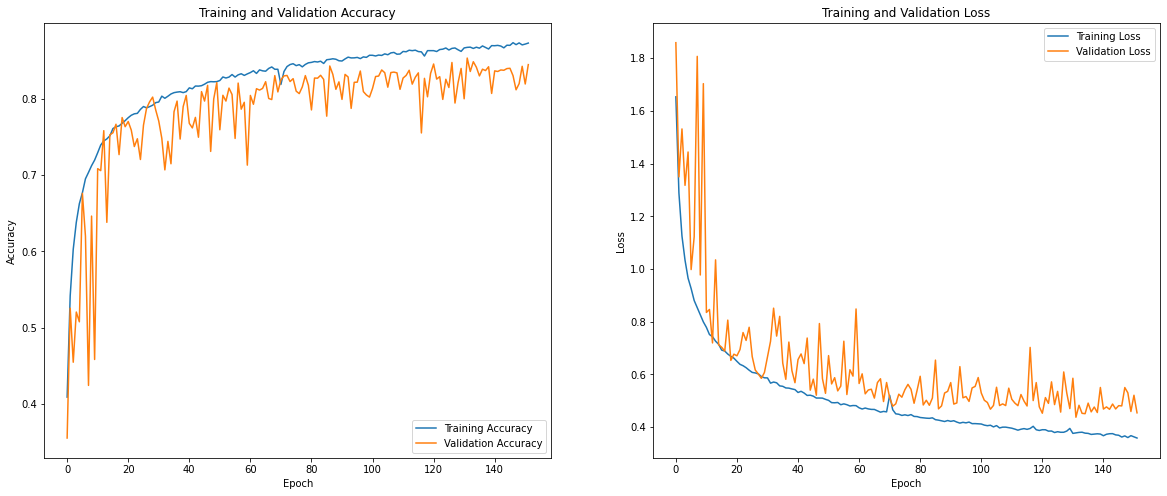

In [ ]:
plot_diagrams(history11, epochs=152)

Early stopping technique helps us to find the optimal number of epochs in order our model neither overfit nor underfit.

In the diagram we can see that loss is stable after epoch 120, so we can assume that if we continue training the model, that will lead to overfitting. So we stop trainning.

## 8.Use transfer learning with the pretrained vgg16 network.

### a. Use only a FCN for classification.

#### Model 12

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
batch_size = 32
epochs = 10

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1, 
    width_shift_range=0.15, 
    height_shift_range=0.15, 
    horizontal_flip=True, 
    rotation_range=15,
    zoom_range=0.15,
    )

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model1 = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model1.trainable = False
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
plot_model(base_model1, to_file='vgg.png')

In [ ]:
model12 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model12.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
test_loss12, test_acc12 = model12.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc12*100) + "%")

313/313 - 3s - loss: 2.4263 - accuracy: 0.0987 - 3s/epoch - 10ms/step
Test accuracy: 9.87%


Our model is terrible before we train it, because it has been trained in a different dataset. This dataset may not contain images of the classes that exist in our dataset, so the model has not learned to detect these classes.

In [ ]:
history12 = model12.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.5973 - accuracy: 0.4416 - val_loss: 1.4061 - val_accuracy: 0.4990
Epoch 2/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.4555 - accuracy: 0.4882 - val_loss: 1.3856 - val_accuracy: 0.5058
Epoch 3/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.4346 - accuracy: 0.4952 - val_loss: 1.3546 - val_accuracy: 0.5234
Epoch 4/10
1407/1407 [==============================] - 29s 21ms/step - loss: 1.4051 - accuracy: 0.5035 - val_loss: 1.3641 - val_accuracy: 0.5164
Epoch 5/10
1407/1407 [==============================] - 30s 22ms/step - loss: 1.3915 - accuracy: 0.5101 - val_loss: 1.3846 - val_accuracy: 0.5052
Epoch 6/10
1407/1407 [==============================] - 36s 25ms/step - loss: 1.3885 - accuracy: 0.5118 - val_loss: 1.3360 - val_accuracy: 0.5268
Epoch 7/10
1407/1407 [==============================] - 35s 25ms/step - loss: 1.3832 - accuracy: 0.5134 - val_loss: 1.3185 -

In [ ]:
test_loss12, test_acc12 = model12.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 1.2485 - accuracy: 0.5560 - 3s/epoch - 9ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc12*100) + "%")

Test accuracy: 55.60%


We can see that our model is not very good, because we have only used fully connected layers for classification at the top of the network. 

Our model have not learned to search for characteristics that exist in images in our dataset, through convolution.

So using only fully connected layers is not a good approach.

### b.Train the last 4 layers of vgg16.

#### Model 13

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model1 = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                               include_top=False,
                                              weights='imagenet')

In [ ]:
# Make the parameters of all the layers except the last 4 layers of vgg16 non trainable
# Now we can train only the last four layers
for i in range(len(base_model1.layers)-4): 
  base_model1.layers[i].trainable = False

base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model13 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model13.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history13 = model13.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 36s 24ms/step - loss: 1.5250 - accuracy: 0.4490 - val_loss: 1.3243 - val_accuracy: 0.5348
Epoch 2/10
1407/1407 [==============================] - 34s 24ms/step - loss: 1.2787 - accuracy: 0.5506 - val_loss: 1.2416 - val_accuracy: 0.6086
Epoch 3/10
1407/1407 [==============================] - 39s 28ms/step - loss: 1.2310 - accuracy: 0.5660 - val_loss: 1.0851 - val_accuracy: 0.6198
Epoch 4/10
1407/1407 [==============================] - 36s 25ms/step - loss: 1.1248 - accuracy: 0.6072 - val_loss: 1.1076 - val_accuracy: 0.6182
Epoch 5/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.0979 - accuracy: 0.6168 - val_loss: 4.6317 - val_accuracy: 0.5686
Epoch 6/10
1407/1407 [==============================] - 34s 24ms/step - loss: 1.0244 - accuracy: 0.6486 - val_loss: 0.9814 - val_accuracy: 0.6662
Epoch 7/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9945 - accuracy: 0.6574 - val_loss: 1.2585 -

In [ ]:
test_loss13, test_acc13 = model13.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8327 - accuracy: 0.7191 - 3s/epoch - 10ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc13*100) + "%")

Test accuracy: 71.91%


The layers at the top of a network are responsible for finding high level characteristics in an image. The layers at the base of a model can find low level characteristics that exist in every image, such as lines and shapes.

For this reason, we often choose to train only the last layers of a pretrained model. So with less computational cost we get better results.

### c.Train the whole model.

#### Model 14

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model1 = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                               include_top=False,
                                              weights='imagenet')

In [ ]:
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model14 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model14.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history14 = model14.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 49s 34ms/step - loss: 2.0086 - accuracy: 0.1944 - val_loss: 1.8851 - val_accuracy: 0.2198
Epoch 2/10
1407/1407 [==============================] - 46s 33ms/step - loss: 1.8339 - accuracy: 0.2420 - val_loss: 2.0898 - val_accuracy: 0.2016
Epoch 3/10
1407/1407 [==============================] - 51s 36ms/step - loss: 1.7695 - accuracy: 0.2685 - val_loss: 3.8293 - val_accuracy: 0.2636
Epoch 4/10
1407/1407 [==============================] - 48s 34ms/step - loss: 1.6522 - accuracy: 0.3296 - val_loss: 1.6290 - val_accuracy: 0.3448
Epoch 5/10
1407/1407 [==============================] - 47s 33ms/step - loss: 1.4388 - accuracy: 0.4400 - val_loss: 1.3867 - val_accuracy: 0.4592
Epoch 6/10
1407/1407 [==============================] - 49s 35ms/step - loss: 1.3444 - accuracy: 0.4894 - val_loss: 171.7555 - val_accuracy: 0.4980
Epoch 7/10
1407/1407 [==============================] - 50s 35ms/step - loss: 1.2584 - accuracy: 0.5353 - val_loss: 1.4385

In [ ]:
test_loss14, test_acc14 = model14.evaluate(test_images,  test_labels, verbose=2)

313/313 - 49s - loss: 0.7882 - accuracy: 0.7215 - 49s/epoch - 155ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc14*100) + "%")

Test accuracy: 72.15%


If we choose to train the whole network, we should have a big dataset. Pretrained models have been trained in very big datasets, so if our dataset is not very big, maybe it is better not to train the first layers of our model.

### d.Train half of the network.

#### Model 15

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model1 = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                               include_top=False,
                                              weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Now we can train all the network, except the first 11 layers
# We will trai only the last 8 layers
for i in range(len(base_model1.layers)-8): 
  base_model1.layers[i].trainable = False

base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model15 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model15.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history15 = model15.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=500, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 41s 29ms/step - loss: 1.8553 - accuracy: 0.2544 - val_loss: 2.1477 - val_accuracy: 0.2470
Epoch 2/10
1407/1407 [==============================] - 43s 30ms/step - loss: 1.4898 - accuracy: 0.4155 - val_loss: 1.4711 - val_accuracy: 0.4448
Epoch 3/10
1407/1407 [==============================] - 37s 26ms/step - loss: 1.1856 - accuracy: 0.5706 - val_loss: 1.0849 - val_accuracy: 0.6148
Epoch 4/10
1407/1407 [==============================] - 37s 26ms/step - loss: 1.0196 - accuracy: 0.6442 - val_loss: 6.7307 - val_accuracy: 0.6902
Epoch 5/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9493 - accuracy: 0.6755 - val_loss: 0.9222 - val_accuracy: 0.6866
Epoch 6/10
1407/1407 [==============================] - 39s 28ms/step - loss: 0.8999 - accuracy: 0.6957 - val_loss: 0.8660 - val_accuracy: 0.7078
Epoch 7/10
1407/1407 [==============================] - 37s 26ms/step - loss: 0.8478 - accuracy: 0.7135 - val_loss: 2.5541 -

In [ ]:
test_loss15, test_acc15 = model15.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.6554 - accuracy: 0.7732 - 3s/epoch - 10ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc15*100) + "%")

Test accuracy: 77.32%


### Early stopping.

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model1 = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                               include_top=False,
                                              weights='imagenet')

In [ ]:
# Now we can train all the network, except the first 11 layers
# We will train only the last 8 layers
for i in range(len(base_model1.layers)-8): 
  base_model1.layers[i].trainable = False

In [ ]:
model16 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model16.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history16 = model16.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=500, batch_size=batch_size, shuffle=True, callbacks=[early_stopping])

In [ ]:
test_loss16, test_acc16 = model16.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 15.1440 - accuracy: 0.8314 - 3s/epoch - 9ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc16*100) + "%")

Test accuracy: 83.14%


In [ ]:
plot_diagrams(history16, epochs=64)

After all, we can understand that we must find the optimal number of layers of a pretrained model that we will train, in order to get the best results with the dataset we have.

### Try with another pretrained model, MobileNetV2.

#### Model 17

In [ ]:
base_model2 = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                              weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for i in range(len(base_model2.layers)-65): 
  base_model2.layers[i].trainable = False
len(base_model2.layers)

154

In [ ]:
base_model2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
model17 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model17.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history17 = model17.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
         validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
         epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 41s 27ms/step - loss: 1.5162 - accuracy: 0.4816 - val_loss: 1.6092 - val_accuracy: 0.5044
Epoch 2/10
1407/1407 [==============================] - 36s 26ms/step - loss: 1.1949 - accuracy: 0.5908 - val_loss: 1.1297 - val_accuracy: 0.6120
Epoch 3/10
1407/1407 [==============================] - 36s 26ms/step - loss: 1.1145 - accuracy: 0.6195 - val_loss: 1.2182 - val_accuracy: 0.6312
Epoch 4/10
1407/1407 [==============================] - 36s 26ms/step - loss: 1.0634 - accuracy: 0.6360 - val_loss: 1.3675 - val_accuracy: 0.6182
Epoch 5/10
1407/1407 [==============================] - 36s 26ms/step - loss: 1.0220 - accuracy: 0.6504 - val_loss: 1.2365 - val_accuracy: 0.6416
Epoch 6/10
1407/1407 [==============================] - 36s 26ms/step - loss: 0.9924 - accuracy: 0.6597 - val_loss: 1.0744 - val_accuracy: 0.6658
Epoch 7/10
1407/1407 [==============================] - 36s 26ms/step - loss: 0.9500 - accuracy: 0.6725 - val_loss: 1.0223 -

In [ ]:
test_loss17, test_acc17 = model17.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.9554 - accuracy: 0.7041 - 3s/epoch - 10ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc17*100) + "%")

Test accuracy: 70.41%


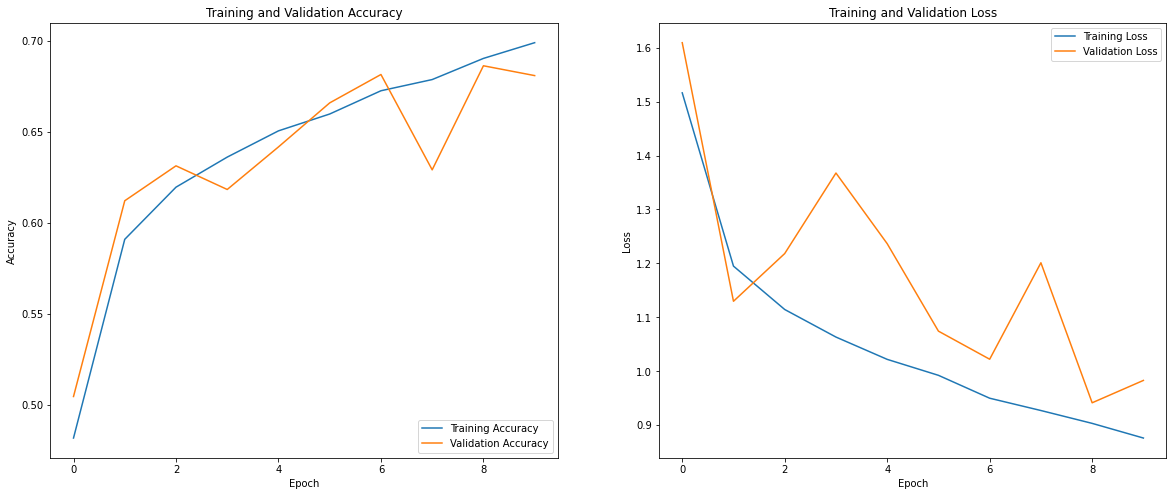

In [ ]:
plot_diagrams(history17, epochs)

#### Model 18

We can save the best model of the training.

We can also use many convolutional layers before pooling, ELU activation function, more carefully data augmentations and steps in training, in order to get better results.

Another improvement is that we used a scheduler (ReduceLROnPlateau) for regulating the learning rate.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 10 Best Model'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

170508288/170498071 [==============================] - 15s 0us/step


In [ ]:
batch_size = 32
epochs = 10
steps_per_epoch = int((train_images.shape[0] // batch_size)*0.9)
validation_steps = int((train_images.shape[0] // batch_size)*0.1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1, 
    width_shift_range=0.15, 
    height_shift_range=0.15, 
    horizontal_flip=True,
    rotation_range=15,
    #zoom_range=0.15,
    )

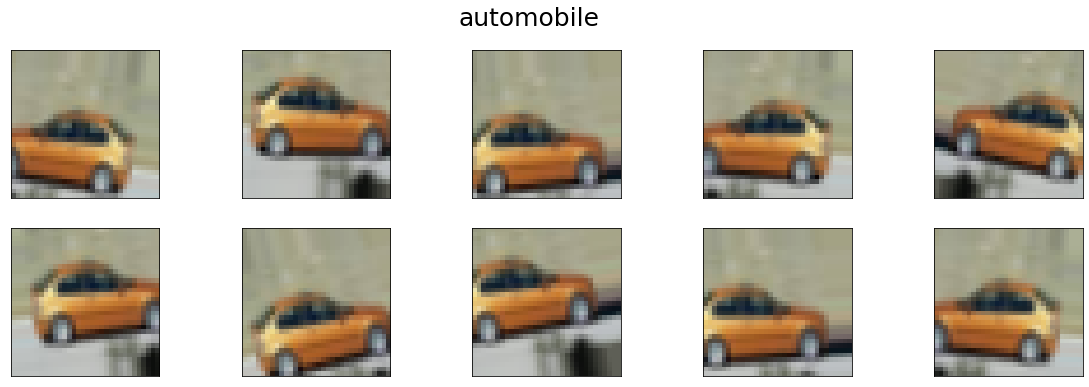

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# See different augmentations on an image
train_data_gen = datagen.flow(train_images, train_labels, batch_size=batch_size)
_ , augmented_training_labels = next(train_data_gen)
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

plt.figure(figsize=(20, 6))
fig = plt.gcf()
fig.suptitle(class_names[augmented_training_labels[0][0]], fontsize=25)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i])
plt.show()

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
model18 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='ELU', input_shape=(32, 32, 3), padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='ELU', padding="same", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model18.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model18.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       1

In [ ]:
history18 = model18.fit(datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
                        steps_per_epoch = steps_per_epoch,
                        validation_data=datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
                        validation_steps = validation_steps,
                        epochs=500, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/500
1403/1405 [============================>.] - ETA: 0s - loss: 1.5868 - accuracy: 0.4312

1405/1405 [==============================] - 56s 30ms/step - loss: 1.5863 - accuracy: 0.4314 - val_loss: 1.4014 - val_accuracy: 0.5082 - lr: 0.0010
Epoch 2/500
1405/1405 [==============================] - ETA: 0s - loss: 1.1078 - accuracy: 0.6108

1405/1405 [==============================] - 35s 25ms/step - loss: 1.1078 - accuracy: 0.6108 - val_loss: 1.1932 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 3/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.9453 - accuracy: 0.6699

1405/1405 [==============================] - 35s 25ms/step - loss: 0.9452 - accuracy: 0.6699 - val_loss: 1.0684 - val_accuracy: 0.6474 - lr: 0.0010
Epoch 4/500
1405/1405 [==============================] - ETA: 0s - loss: 0.8310 - accuracy: 0.7156

1405/1405 [==============================] - 35s 25ms/step - loss: 0.8310 - accuracy: 0.7156 - val_loss: 0.9014 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 5/500
1405/1405 [==============================] - 32s 23ms/step - loss: 0.7485 - accuracy: 0.7431 - val_loss: 0.9233 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 6/500
1405/1405 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.7631

1405/1405 [==============================] - 35s 25ms/step - loss: 0.6933 - accuracy: 0.7631 - val_loss: 0.7138 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 7/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.6441 - accuracy: 0.7814 - val_loss: 0.7353 - val_accuracy: 0.7596 - lr: 0.0010
Epoch 8/500
1404/1405 [============================>.] - ETA: 0s - loss: 0.6006 - accuracy: 0.7964

1405/1405 [==============================] - 35s 25ms/step - loss: 0.6006 - accuracy: 0.7964 - val_loss: 0.6637 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 9/500
1405/1405 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.8043

1405/1405 [==============================] - 36s 25ms/step - loss: 0.5727 - accuracy: 0.8043 - val_loss: 0.6251 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 10/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.5401 - accuracy: 0.8166 - val_loss: 0.6590 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 11/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.5145 - accuracy: 0.8253

1405/1405 [==============================] - 35s 25ms/step - loss: 0.5143 - accuracy: 0.8253 - val_loss: 0.5825 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 12/500
1404/1405 [============================>.] - ETA: 0s - loss: 0.4922 - accuracy: 0.8330

1405/1405 [==============================] - 35s 25ms/step - loss: 0.4923 - accuracy: 0.8330 - val_loss: 0.5675 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 13/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.4658 - accuracy: 0.8412

1405/1405 [==============================] - 35s 25ms/step - loss: 0.4659 - accuracy: 0.8411 - val_loss: 0.5298 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 14/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.4630 - accuracy: 0.8426 - val_loss: 0.5432 - val_accuracy: 0.8211 - lr: 0.0010
Epoch 15/500
1405/1405 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.8503

1405/1405 [==============================] - 35s 25ms/step - loss: 0.4406 - accuracy: 0.8503 - val_loss: 0.5184 - val_accuracy: 0.8265 - lr: 0.0010
Epoch 16/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.8579

1405/1405 [==============================] - 35s 25ms/step - loss: 0.4226 - accuracy: 0.8579 - val_loss: 0.4873 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 17/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.4040 - accuracy: 0.8642 - val_loss: 0.5324 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 18/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3947 - accuracy: 0.8660 - val_loss: 0.5061 - val_accuracy: 0.8291 - lr: 0.0010
Epoch 19/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3911 - accuracy: 0.8671 - val_loss: 0.4946 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 20/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3709 - accuracy: 0.8749 - val_loss: 0.4954 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 21/500
1405/1405 [==============================] - ETA: 0s - loss: 0.3687 - accuracy: 0.8754

1405/1405 [==============================] - 35s 25ms/step - loss: 0.3687 - accuracy: 0.8754 - val_loss: 0.4429 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 22/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8762

1405/1405 [==============================] - 35s 25ms/step - loss: 0.3583 - accuracy: 0.8762 - val_loss: 0.4181 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 23/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3470 - accuracy: 0.8822 - val_loss: 0.4227 - val_accuracy: 0.8586 - lr: 0.0010
Epoch 24/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3382 - accuracy: 0.8839 - val_loss: 0.4372 - val_accuracy: 0.8580 - lr: 0.0010
Epoch 25/500
1405/1405 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.8840

1405/1405 [==============================] - 35s 25ms/step - loss: 0.3379 - accuracy: 0.8840 - val_loss: 0.3975 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 26/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.3279 - accuracy: 0.8876 - val_loss: 0.4644 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 27/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3184 - accuracy: 0.8901 - val_loss: 0.4414 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 28/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3118 - accuracy: 0.8949 - val_loss: 0.4309 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 29/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.3041 - accuracy: 0.8962 - val_loss: 0.4386 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 30/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.2940 - accuracy: 0.8997 - val_loss: 0.4840 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 31/500
1405/1405 [=======================

1405/1405 [==============================] - 35s 25ms/step - loss: 0.2539 - accuracy: 0.9117 - val_loss: 0.3632 - val_accuracy: 0.8830 - lr: 5.0000e-04
Epoch 32/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.2349 - accuracy: 0.9186 - val_loss: 0.4061 - val_accuracy: 0.8706 - lr: 5.0000e-04
Epoch 33/500
1405/1405 [==============================] - ETA: 0s - loss: 0.2331 - accuracy: 0.9193

1405/1405 [==============================] - 35s 25ms/step - loss: 0.2331 - accuracy: 0.9193 - val_loss: 0.3599 - val_accuracy: 0.8860 - lr: 5.0000e-04
Epoch 34/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.2238 - accuracy: 0.9228 - val_loss: 0.3667 - val_accuracy: 0.8872 - lr: 5.0000e-04
Epoch 35/500
1405/1405 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9255

1405/1405 [==============================] - 35s 25ms/step - loss: 0.2167 - accuracy: 0.9255 - val_loss: 0.3545 - val_accuracy: 0.8880 - lr: 5.0000e-04
Epoch 36/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.2123 - accuracy: 0.9264 - val_loss: 0.3802 - val_accuracy: 0.8818 - lr: 5.0000e-04
Epoch 37/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.2147 - accuracy: 0.9270 - val_loss: 0.3688 - val_accuracy: 0.8826 - lr: 5.0000e-04
Epoch 38/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.2031 - accuracy: 0.9292 - val_loss: 0.4100 - val_accuracy: 0.8766 - lr: 5.0000e-04
Epoch 39/500
1403/1405 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9288

1405/1405 [==============================] - 35s 25ms/step - loss: 0.2053 - accuracy: 0.9288 - val_loss: 0.3504 - val_accuracy: 0.8876 - lr: 5.0000e-04
Epoch 40/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1988 - accuracy: 0.9307 - val_loss: 0.3889 - val_accuracy: 0.8848 - lr: 5.0000e-04
Epoch 41/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1913 - accuracy: 0.9329 - val_loss: 0.3584 - val_accuracy: 0.8904 - lr: 5.0000e-04
Epoch 42/500
1405/1405 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9332

1405/1405 [==============================] - 35s 25ms/step - loss: 0.1931 - accuracy: 0.9332 - val_loss: 0.3385 - val_accuracy: 0.8926 - lr: 5.0000e-04
Epoch 43/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1921 - accuracy: 0.9339 - val_loss: 0.3797 - val_accuracy: 0.8888 - lr: 5.0000e-04
Epoch 44/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1897 - accuracy: 0.9346 - val_loss: 0.4050 - val_accuracy: 0.8814 - lr: 5.0000e-04
Epoch 45/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1840 - accuracy: 0.9351 - val_loss: 0.3646 - val_accuracy: 0.8896 - lr: 5.0000e-04
Epoch 46/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1834 - accuracy: 0.9374 - val_loss: 0.3891 - val_accuracy: 0.8850 - lr: 5.0000e-04
Epoch 47/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1819 - accuracy: 0.9381 - val_loss: 0.3585 - val_accuracy: 0.8944 - lr: 5.0000e-04
Epoch 48/500
1405/1405 

1405/1405 [==============================] - 36s 25ms/step - loss: 0.1536 - accuracy: 0.9463 - val_loss: 0.3377 - val_accuracy: 0.8990 - lr: 2.5000e-04
Epoch 50/500
1404/1405 [============================>.] - ETA: 0s - loss: 0.1498 - accuracy: 0.9486

1405/1405 [==============================] - 35s 25ms/step - loss: 0.1498 - accuracy: 0.9486 - val_loss: 0.3232 - val_accuracy: 0.8986 - lr: 2.5000e-04
Epoch 51/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1459 - accuracy: 0.9504 - val_loss: 0.3481 - val_accuracy: 0.8936 - lr: 2.5000e-04
Epoch 52/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1432 - accuracy: 0.9504 - val_loss: 0.3417 - val_accuracy: 0.9004 - lr: 2.5000e-04
Epoch 53/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1457 - accuracy: 0.9493 - val_loss: 0.3663 - val_accuracy: 0.8924 - lr: 2.5000e-04
Epoch 54/500
1405/1405 [==============================] - 31s 22ms/step - loss: 0.1380 - accuracy: 0.9523 - val_loss: 0.3449 - val_accuracy: 0.8980 - lr: 2.5000e-04
Epoch 55/500
1405/1405 [==============================] - 30s 22ms/step - loss: 0.1389 - accuracy: 0.9517 - val_loss: 0.3430 - val_accuracy: 0.9016 - lr: 2.5000e-04
Epoch 56/500
1405/1405 

In [ ]:
test_loss18, test_acc18 = model18.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.3483 - accuracy: 0.9018 - 2s/epoch - 6ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc18*100) + "%")

Test accuracy: 90.18%


## 9.Visualize results.
a. Plot the history of the accuracy and loss.

b.Use confusion matrix.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn 

In [ ]:
predicted_labels = model18.predict(test_images)
predicted_labels

array([[4.9120022e-06, 2.1174938e-05, 3.1814203e-04, ..., 5.0885342e-07,
        5.9948643e-06, 4.0046319e-07],
       [2.5735444e-06, 1.4663677e-05, 5.9965026e-07, ..., 1.2213834e-09,
        9.9997652e-01, 3.2305470e-06],
       [3.9958561e-04, 1.1713128e-01, 2.3609234e-04, ..., 1.3621722e-05,
        8.8134569e-01, 6.8110827e-04],
       ...,
       [8.0418404e-06, 1.8154361e-07, 6.9216767e-04, ..., 2.8503813e-05,
        2.2486536e-06, 2.4281405e-07],
       [3.9689694e-06, 9.9840480e-01, 8.9006621e-04, ..., 2.3906964e-06,
        1.1692688e-06, 6.6117701e-07],
       [2.0303452e-05, 3.5411671e-05, 4.5419216e-05, ..., 9.9972278e-01,
        2.9598001e-05, 1.9812564e-06]], dtype=float32)

In [ ]:
# Find the category with the highest probability
predicted_labels = np.argmax(predicted_labels, axis=1)
predicted_labels

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# Convert labels from one hot encoding to numbers
test_labels_not_encoded = np.argmax(test_labels, axis=-1) 
test_labels_not_encoded

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
def plot_diagrams(history, epochs=epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

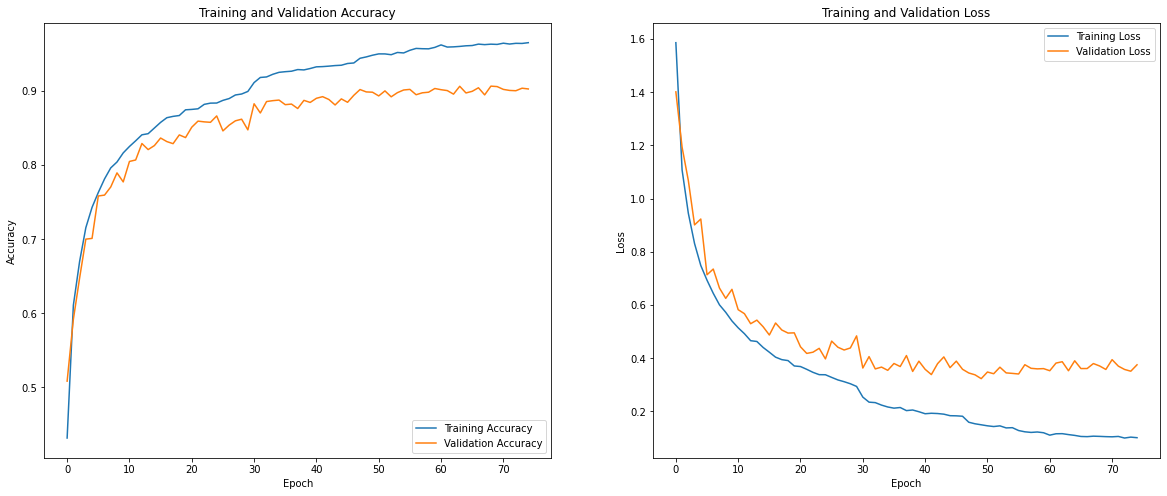

In [ ]:
plot_diagrams(history18, epochs=75)

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(15, 10))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    ax.yaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

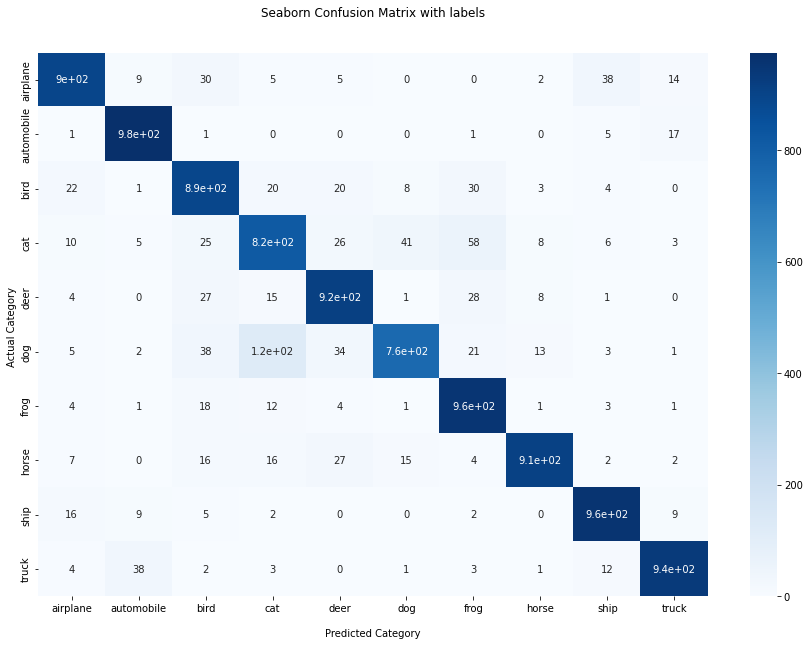

In [ ]:
plot_confusion_matrix(test_labels_not_encoded, predicted_labels)

A confusion matrix visualizes and summarizes the performance of a classification algorithm.
The name stems from the fact that it makes it easy to see whether the system is confusing two classes (commonly mislabeling one as another).

In our matrix, the most mislabeled categories are cats and dogs (120 mislabeled dogs as cats).

## 10. Load best model and visualize filters/feature maps.
Save model after training. Load this model 
and evaluate it (model.evaluate())
Use callbacks to save best weights of the 
model (best val accuracy or val loss).


### Best Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn 
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 10 Best Model'
best_model = load_model(checkpoint_filepath)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170508288/170498071 [==============================] - 3s 0us/step


In [2]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 58s - loss: 0.3483 - accuracy: 0.9018 - 58s/epoch - 185ms/step


In [3]:
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

Test accuracy: 90.18%


In [5]:
predicted_labels = best_model.predict(test_images)
# Find the category with the highest probability
predicted_labels = np.argmax(predicted_labels, axis=1)
# Convert labels from one hot encoding to numbers
test_labels_not_encoded = np.argmax(test_labels, axis=-1) 

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_report = sklearn.metrics.classification_report(test_labels_not_encoded, predicted_labels, target_names=class_names, digits=4)
print(class_report)

              precision    recall  f1-score   support

    airplane     0.9247    0.8970    0.9107      1000
  automobile     0.9375    0.9750    0.9559      1000
        bird     0.8463    0.8920    0.8685      1000
         cat     0.8075    0.8180    0.8127      1000
        deer     0.8876    0.9160    0.9016      1000
         dog     0.9191    0.7610    0.8326      1000
        frog     0.8666    0.9550    0.9087      1000
       horse     0.9620    0.9110    0.9358      1000
        ship     0.9282    0.9570    0.9424      1000
       truck     0.9522    0.9360    0.9440      1000

    accuracy                         0.9018     10000
   macro avg     0.9032    0.9018    0.9013     10000
weighted avg     0.9032    0.9018    0.9013     10000



In [6]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(15, 10))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    ax.yaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

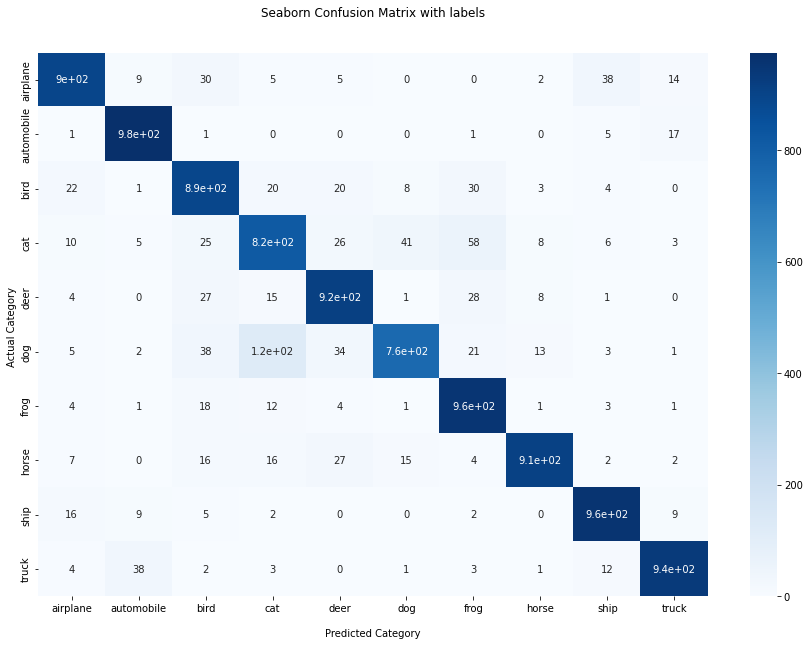

In [7]:
plot_confusion_matrix(test_labels_not_encoded, predicted_labels)

### Visualize filters

In [ ]:
for layer in best_model.layers:
    if 'conv' not in layer.name:
        continue    
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 32)
conv2d_3 (3, 3, 32, 64)
conv2d_4 (3, 3, 64, 64)
conv2d_5 (3, 3, 64, 64)
conv2d_6 (3, 3, 64, 128)
conv2d_7 (3, 3, 128, 128)
conv2d_8 (3, 3, 128, 128)
conv2d_9 (3, 3, 128, 256)
conv2d_10 (3, 3, 256, 256)
conv2d_11 (3, 3, 256, 256)


In [ ]:
# retrieve weights from the first hidden layer
filters, bias = best_model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

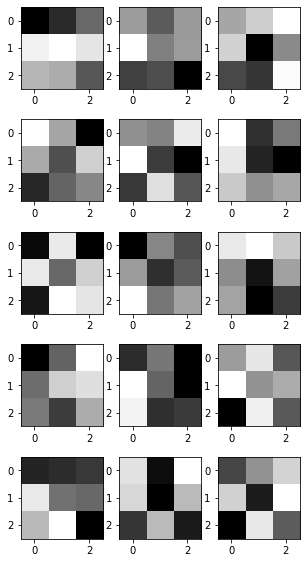

In [ ]:
# Visualise 5 filters out of 32 filters from 1st layer
n_filters = 5
ix=1
fig = plt.figure(figsize=(5, 10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

### Visualize feature maps

In [ ]:
layer_names = []
for i in range(len(best_model.layers)):
    layer = best_model.layers[i]
    if 'conv' not in layer.name:
        continue  
    layer_names.append(layer.name)  
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 32, 32, 32)
2 conv2d_1 (None, 32, 32, 32)
4 conv2d_2 (None, 32, 32, 32)
8 conv2d_3 (None, 16, 16, 64)
10 conv2d_4 (None, 16, 16, 64)
12 conv2d_5 (None, 16, 16, 64)
16 conv2d_6 (None, 8, 8, 128)
18 conv2d_7 (None, 8, 8, 128)
20 conv2d_8 (None, 8, 8, 128)
24 conv2d_9 (None, 4, 4, 256)
26 conv2d_10 (None, 4, 4, 256)
28 conv2d_11 (None, 4, 4, 256)


In [ ]:
layer_names

['conv2d',
 'conv2d_1',
 'conv2d_2',
 'conv2d_3',
 'conv2d_4',
 'conv2d_5',
 'conv2d_6',
 'conv2d_7',
 'conv2d_8',
 'conv2d_9',
 'conv2d_10',
 'conv2d_11']

In [ ]:
layer_names.reverse()
layer_names

['conv2d_11',
 'conv2d_10',
 'conv2d_9',
 'conv2d_8',
 'conv2d_7',
 'conv2d_6',
 'conv2d_5',
 'conv2d_4',
 'conv2d_3',
 'conv2d_2',
 'conv2d_1',
 'conv2d']

In [ ]:
from keras.models import Model

# redefine model to output right after the first hidden layer
ixs = [0, 2, 4, 8, 10, 12, 16, 18, 20, 24, 26, 28]

outputs = [best_model.layers[i].output for i in ixs]
model = Model(inputs=best_model.inputs, outputs=outputs)

In [ ]:
image = test_images[0]
image = np.expand_dims(image, axis=0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Convert labels from one hot encoding to numbers
test_labels_not_encoded = np.argmax(test_labels, axis=-1) 

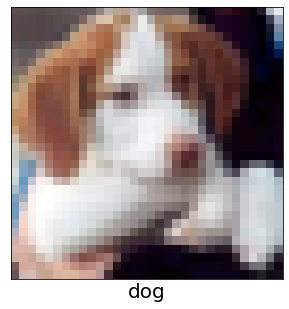

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[16])
plt.xlabel(class_names[test_labels_not_encoded[16]], fontsize=20)
plt.show()

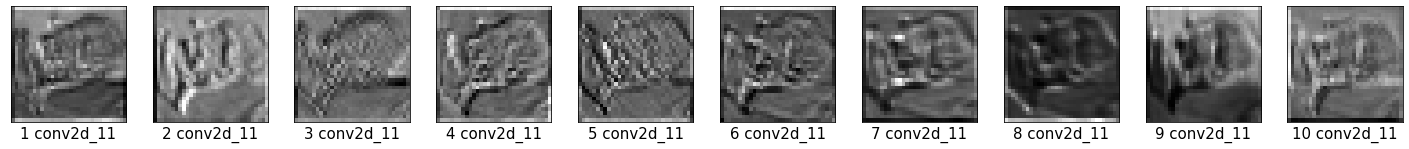

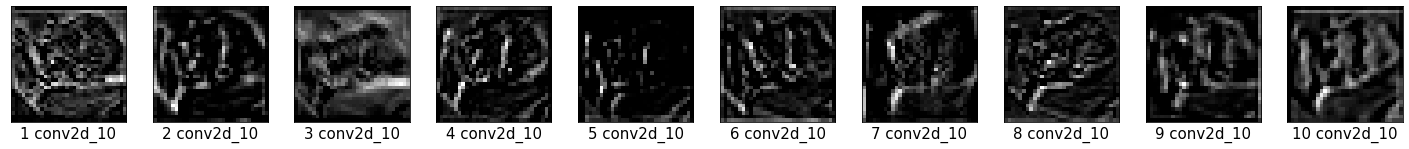

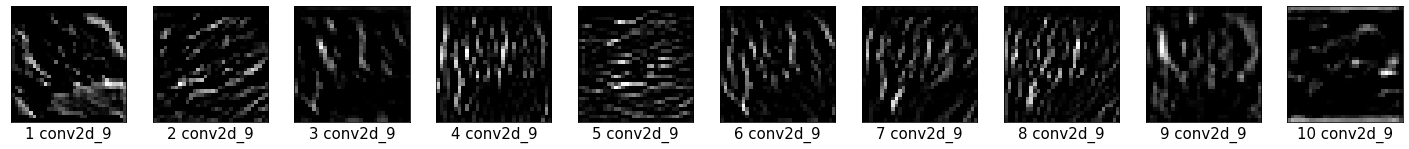

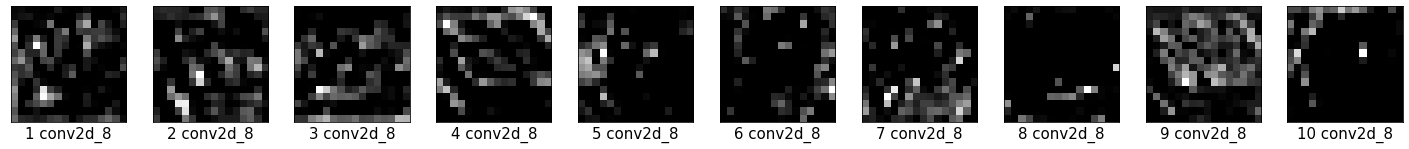

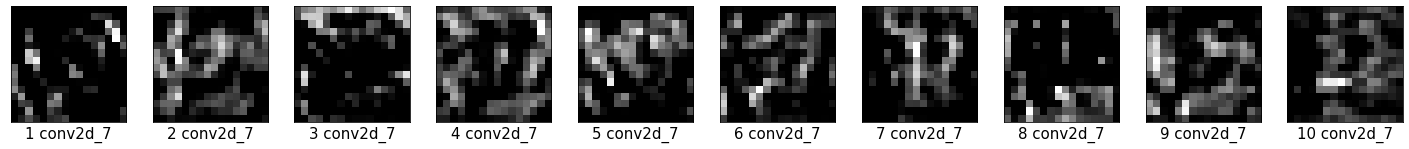

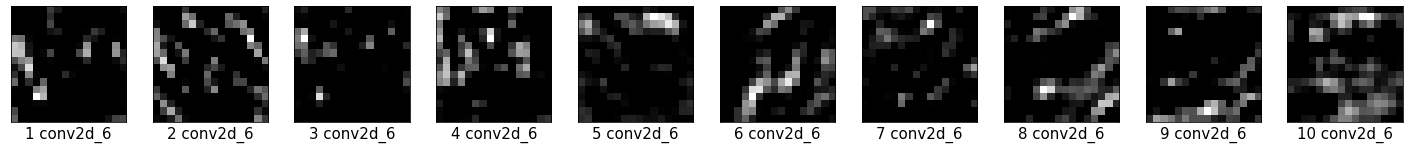

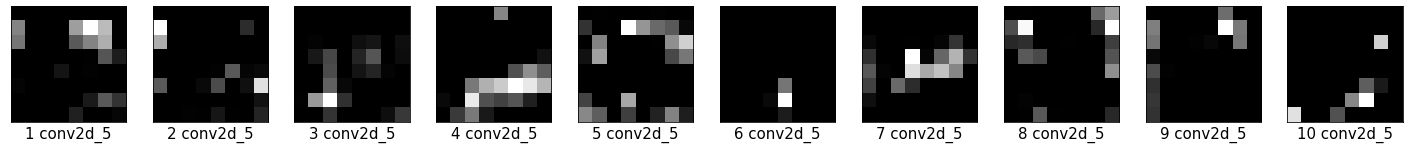

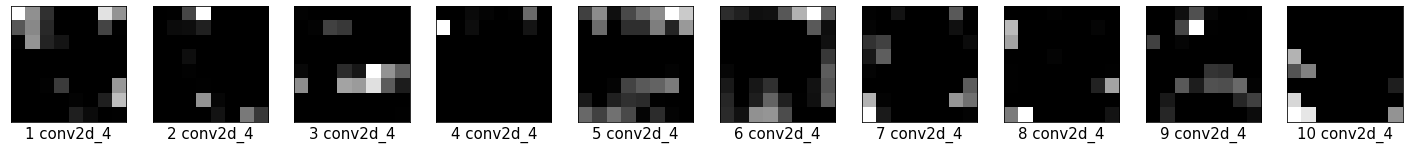

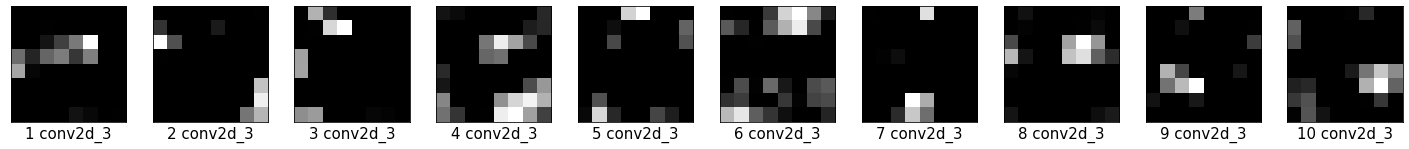

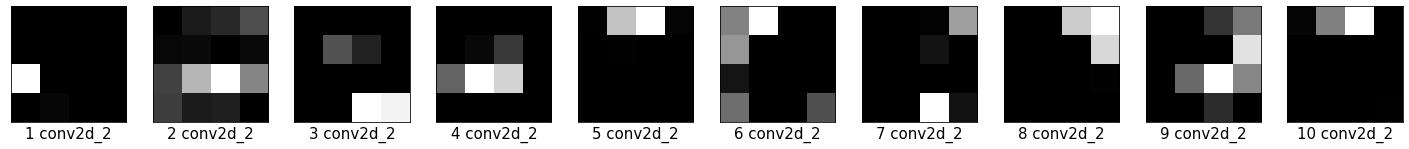

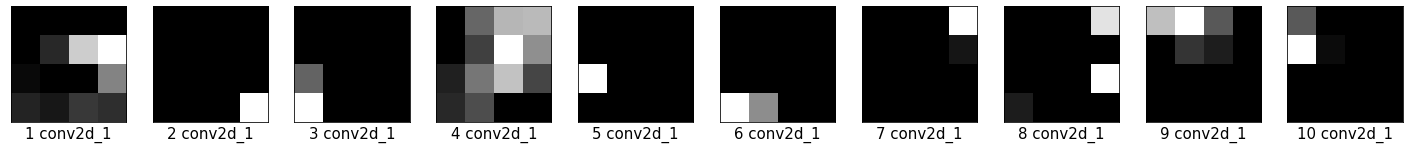

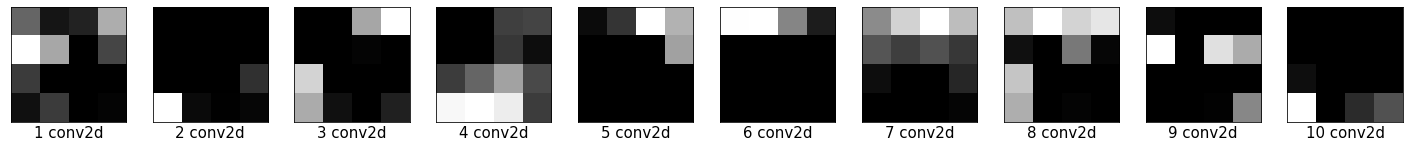

In [ ]:
import matplotlib.gridspec as gridspec

# get feature map for first hidden layer
feature_maps = model.predict(image)
# plot the output from each block
square = 10
layer_index = 0
for fmap in feature_maps:
	ix = 1
	fig = plt.figure(figsize=(25, 25))
	#plt.suptitle(layer_names[layer_index], fontsize=20, y=0.5)

	f = 1
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.xlabel(str(f) + " " + layer_names[layer_index], fontsize=15)
		f += 1

		# plot filter channel in grayscale
		plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
		ix += 1
	layer_index += 1
	# show the figure
	plt.show()